In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings

import dataframe_image as dfi

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

+ *Descarrego els arxius json obtinguts des de la web d'AEMET*

In [2]:
import json
data0 = pd.read_json('aemet_2016_2021.json')

In [3]:
data0

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2016-09-20,0200E,"BARCELONA, FABRA",BARCELONA,408,"20,1","0,0","17,3",Varias,"22,9",11:18,21.0,"2,5","7,2",14:08,"2,5","968,6",00,"965,9",16
1,2016-09-21,0200E,"BARCELONA, FABRA",BARCELONA,408,"21,0","0,0","16,8",05:02,"25,3",Varias,20.0,"3,3","10,3",14:23,"9,4","970,1",Varias,"967,0",Varias
2,2016-09-22,0200E,"BARCELONA, FABRA",BARCELONA,408,"21,2","0,0","16,7",05:47,"25,6",11:15,13.0,"1,9","6,9",14:19,"5,5","973,5",Varias,"970,0",Varias
3,2016-09-23,0200E,"BARCELONA, FABRA",BARCELONA,408,"19,6","66,0","14,6",20:10,"24,6",14:05,NaN,"3,6",NaN,NaN,"1,3","977,0",22,"973,4",Varias
4,2016-09-24,0200E,"BARCELONA, FABRA",BARCELONA,408,"20,6","0,0","16,6",00:10,"24,6",14:25,NaN,"2,2",NaN,NaN,"5,6","975,3",01,"972,9",Varias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2021-07-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"24,8","0,0","19,8",Varias,"29,9",13:11,21.0,"6,4","12,2",13:54,"13,1","968,5",00,"966,2",Varias
1772,2021-07-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"25,2","0,0","19,7",23:22,"30,6",13:39,8.0,"3,1","11,4",07:01,"12,5","968,8",Varias,"966,5",02
1773,2021-07-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"25,1","0,0","19,9",00:05,"30,3",14:47,20.0,"3,1","9,4",12:06,"12,9","968,8",00,"965,9",Varias
1774,2021-07-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"25,6","0,0","20,7",Varias,"30,4",Varias,6.0,"2,2","9,7",19:43,"7,4","966,1",00,"963,8",15


In [4]:
data1 = pd.read_json('aemet_2013_2016.json')

In [5]:
data1 

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2013-01-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,2",Ip,"5,3",10:47,"9,0",21:40,32,"3,9","11,9",10:57,"0,3","969,5",24,"965,6",Varias
1,2013-01-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,0","0,0","5,7",08:04,"12,2",14:18,32,"3,6","12,8",02:19,"8,7","978,1",24,"969,5",Varias
2,2013-01-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,8","0,0","5,3",03:38,"12,2",Varias,31,"4,7","11,9",23:32,"6,9","987,2",Varias,"978,1",00
3,2013-01-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"11,4","0,0","7,5",03:51,"15,2",21:09,30,"10,0","16,4",05:33,"7,7","986,7",00,"982,0",24
4,2013-01-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"12,6","0,0","8,8",08:27,"16,5",14:17,32,"11,7","15,0",11:04,"8,8","982,0",00,"975,4",19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,2016-09-15,0200E,"BARCELONA, FABRA",BARCELONA,408,"18,2","0,1","13,3",04:46,"23,2",11:48,22,"4,2","11,7",14:36,"6,9","967,5",Varias,"964,1",03
1354,2016-09-16,0200E,"BARCELONA, FABRA",BARCELONA,408,"20,8","0,0","15,0",05:51,"26,6",12:42,31,"3,1","8,6",04:04,"9,8","971,6",22,"966,1",04
1355,2016-09-17,0200E,"BARCELONA, FABRA",BARCELONA,408,"19,0",Ip,"14,0",23:59,"24,0",13:39,31,"5,3","11,9",01:18,"5,5","971,5",00,"968,8",16
1356,2016-09-18,0200E,"BARCELONA, FABRA",BARCELONA,408,"18,6","0,0","13,2",05:45,"24,1",12:27,33,"3,6","9,4",05:49,"8,9","970,1",Varias,"967,9",15


In [6]:
data2 = pd.read_json('aemet_2009_2012.json')
data2

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2009-01-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,5","0,0","8,4",10:10,"10,6",02:33,28,"3,3","9,2",05:50,"0,9","972,6",00,"970,1",Varias
1,2009-01-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,2","0,4","6,7",22:30,"9,6",13:13,31,"2,5","8,3",23:54,"0,0","970,3",00,"967,1",24
2,2009-01-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,2","0,5","5,8",21:45,"8,6",11:35,6,"3,6","8,9",23:50,"0,0","967,4",10,"966,3",Varias
3,2009-01-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,7","0,0","4,2",07:05,"9,2",13:49,31,"4,2","11,1",22:43,"7,2","969,3",11,"966,8",01
4,2009-01-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"3,6","0,0","1,4",Varias,"5,8",Varias,32,"9,7","15,8",19:59,"7,0","967,7",00,"962,9",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2012-12-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,1","0,0","5,4",07:14,"12,8",13:49,33,"2,5","15,8",19:30,"8,6","977,6",24,"975,7",Varias
1457,2012-12-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"11,8","0,0","8,8",10:20,"14,7",14:45,33,"2,5","14,2",00:19,"4,5","982,3",11,"977,6",00
1458,2012-12-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"11,8","0,0","8,7",00:14,"15,0",13:20,30,"5,6","12,5",20:33,"9,0","978,2",00,"970,7",Varias
1459,2012-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,0","0,0","6,0",Varias,"14,0",13:42,29,"3,9","12,8",05:06,"8,2","979,4",Varias,"973,7",00


In [7]:
data3 = pd.read_json('aemet_2005_208.json')
data3

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2005-01-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,8","0,0","6,9",05:43,"12,7",15:23,32.0,"6,1","11,9",04:33,"9,1","980,0",22,"977,7",04
1,2005-01-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,9","0,0","6,2",07:53,"11,6",18:50,32.0,"5,3","12,5",05:52,"8,5","982,9",23,"978,7",05
2,2005-01-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,3","0,0","6,0",08:59,"10,6",14:49,30.0,"6,1","11,9",12:25,"8,9","985,9",21,"982,7",01
3,2005-01-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,6","0,0","5,8",07:53,"13,4",14:50,30.0,"5,6","11,7",09:25,"9,1","985,7",00,"983,4",15
4,2005-01-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,7","0,0","5,4",23:55,"12,0",14:21,32.0,"5,8","12,5",20:35,"7,1","985,5",10,"983,4",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2008-12-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,6","17,6","6,5",10:36,"8,8",17:55,6.0,"8,1","19,7",03:22,"0,0","968,6",11,"964,7",01
1457,2008-12-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,6","1,4","4,9",Varias,"8,2",00:00,6.0,"7,2","15,8",01:16,"0,0","971,8",Varias,"967,2",Varias
1458,2008-12-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,4","2,0","5,0",01:03,"7,8",23:59,6.0,"3,1","8,9",00:04,"0,0","974,7",23,"971,6",01
1459,2008-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,7","1,4","7,6",01:24,"11,8",12:34,27.0,"3,3","10,8",08:57,"3,1","977,7",20,"974,6",00


In [8]:
data4 = pd.read_json('aemet_2001_2004.json')
data4

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2001-01-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,0","0,0","6,7",00:05,"13,3",13:55,26.0,"4,7","13,1",04:35,"5,9","965,7",00,"960,0",24
1,2001-01-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"12,1","0,0","8,9",23:55,"15,3",13:06,22.0,"5,6","16,1",17:05,"5,5","965,2",24,"958,8",06
2,2001-01-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,5","0,0","8,0",07:00,"13,0",13:24,26.0,"3,6","13,1",03:45,"6,0","968,7",11,"964,7",24
3,2001-01-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"11,9","0,0","9,4",07:27,"14,4",12:05,23.0,"5,8","20,6",11:39,"7,5","968,7",21,"960,8",05
4,2001-01-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"13,0","0,0","9,8",02:21,"16,2",22:27,23.0,"9,2","23,6",19:30,"1,2","967,5",00,"956,5",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2004-12-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"4,2","0,0","1,7",08:40,"6,6",16:00,31.0,"7,5","13,6",09:08,"2,9","968,1",23,"954,6",00
1457,2004-12-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"4,0","0,0","0,9",05:10,"7,0",22:00,25.0,"5,3","15,3",14:52,"1,3","968,8",04,"962,7",15
1458,2004-12-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,8","0,0","4,3",04:39,"11,2",14:03,1.0,"4,7","11,4",15:50,"8,7","974,7",22,"968,2",01
1459,2004-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,0","0,0","6,0",06:05,"12,1",14:29,31.0,"3,1","7,2",23:49,"8,9","981,5",10,"974,6",00


In [9]:
data5 = pd.read_json('aemet_1997_2000.json')
data5

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,1997-01-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"5,0","7,4","1,8",01:30,"8,2",13:00,32.0,"4,4","11,1",00:05,"7,7","962,3",19,"955,6",00
1,1997-01-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,0","4,9","3,4",01:15,"8,6",11:30,2.0,"6,9","14,7",03:40,"0,0","961,1",00,"953,7",12
2,1997-01-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,6","24,0","3,8",11:50,"9,4",08:30,19.0,"6,4","22,8",08:40,"3,9","956,1",00,"943,8",11
3,1997-01-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"4,6","0,0","2,4",03:00,"6,8",13:00,25.0,"4,7","18,9",04:20,"5,9","957,7",24,"946,8",16
4,1997-01-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"3,5","0,4","0,6",07:00,"6,4",13:00,34.0,"1,9","14,4",06:05,"4,3","963,0",11,"957,7",00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2000-12-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,3","0,2","7,4",08:23,"11,2",00:58,33.0,"5,3","14,7",06:51,"4,1","948,5",24,"940,7",06
1457,2000-12-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,3","0,2","4,7",23:09,"7,9",00:19,32.0,"7,5","21,1",07:48,"1,0","956,1",10,"947,1",24
1458,2000-12-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,4","0,0","5,0",00:05,"11,8",13:00,24.0,"5,3","18,3",16:21,"7,0","959,4",17,"947,1",00
1459,2000-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,8","0,1","4,2",23:51,"9,4",08:22,32.0,"6,1","15,6",21:43,"0,3","961,8",24,"946,3",12


In [10]:
data6 = pd.read_json('aemet_1993_1996.json')
data6

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,racha,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,horaracha
0,1993-01-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"4,1","0,0","0,8",00:15,"7,4",14:00,29.0,"5,0","6,7","975,2",23,"972,9",00,NaN,NaN
1,1993-01-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"4,4","0,0","0,2",23:59,"8,6",12:45,20.0,"3,1","1,3","975,3",10,"970,2",24,"1,7",NaN
2,1993-01-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"0,7","0,0","-2,0",02:00,"3,4",15:00,32.0,"6,9","0,0","974,8",24,"970,2",00,NaN,NaN
3,1993-01-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"2,8","0,0","0,8",04:10,"4,8",13:30,27.0,"5,0","0,4","982,7",23,"974,7",03,"3,6",NaN
4,1993-01-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"5,0","0,0","2,0",02:45,"8,0",15:00,11.0,"5,0","7,1","986,1",11,"982,5",00,"3,6",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1996-12-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"4,3","0,0","2,0",07:50,"6,6",Varias,27.0,"8,1","1,0","975,5",03,"965,6",24,"2,8",Varias
1457,1996-12-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"4,8",Ip,"3,0",23:59,"6,6",10:10,7.0,"9,4","2,2","975,5",03,"958,3",24,"3,6",Varias
1458,1996-12-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"3,2","0,0","1,8",06:00,"4,6",13:05,4.0,"13,9","0,0","958,4",01,"957,0",08,"4,7",06:40
1459,1996-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"3,1","0,0","1,6",06:50,"4,6",13:00,31.0,"8,1","0,0","958,4",01,"954,8",24,"3,9",23:50


In [11]:
data7 = pd.read_json('aemet_1987_1991.json')
data7

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,1987-01-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"11,5","0,0","7,6",02:50,"15,4",13:45,31.0,"7,5","20,0",19:40,"8,5","974,3",11,"970,9",22
1,1987-01-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,5","0,0","6,8",23:59,"12,2",13:00,33.0,"1,9","17,2",08:20,"6,1","971,1",00,"967,1",18
2,1987-01-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,5","0,0","4,8",03:50,"10,2",14:45,27.0,"4,2","15,0",03:30,"8,1","971,5",24,"966,2",07
3,1987-01-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"6,5","0,0","3,0",05:15,"10,0",15:10,31.0,"8,3","15,6",08:25,"8,6","977,6",23,"971,5",00
4,1987-01-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,0","0,0","4,8",03:00,"11,2",15:30,29.0,"9,2","14,4",03:25,"8,5","977,5",00,"973,0",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1991-12-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,1","0,0","5,6",00:30,"12,6",13:15,30.0,"5,6","15,0",04:50,"8,5","978,0",00,"972,3",14
1822,1991-12-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,0","0,0","4,0",05:15,"12,0",15:30,30.0,"3,3","12,8",04:50,"8,0","979,2",24,"972,1",03
1823,1991-12-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,4","0,0","4,6",05:15,"10,2",15:30,26.0,"2,2","8,9",23:30,"8,3","984,1",18,"979,2",00
1824,1991-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,3","0,0","5,6",04:15,"11,0",11:30,26.0,"6,9","11,1",07:00,"5,2","986,1",11,"983,9",02


In [12]:
data8 = pd.read_json('aemet_1983_1986.json')
data8

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,1983-03-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,0","0,0","6,6",06:15,"13,4",14:15,27.0,"2,8","8,1",04:30,"3,8","970,3",00,"967,5",15
1,1983-03-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,7","0,0","6,8",00:15,"10,6",12:30,20.0,"1,1","8,1",15:00,"0,3","976,8",24,"970,1",00
2,1983-03-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,4","0,0","5,4",08:00,"11,4",12:50,5.0,"1,4","6,1",06:00,"2,8","980,3",24,"976,8",00
3,1983-03-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,4","0,0","4,4",05:00,"10,4",13:15,27.0,"1,9","10,0",19:30,"0,0","981,3",12,"980,3",06
4,1983-03-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,7","0,0","7,4",06:00,"14,0",11:15,32.0,"0,8","8,9",00:30,"0,7","980,9",12,"979,1",04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1986-12-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,8","0,0","6,2",08:40,"13,4",02:00,36.0,"3,9","22,5",02:30,"8,3","978,0",24,"968,5",01
1398,1986-12-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,8","0,0","5,0",06:50,"10,6",15:15,34.0,"4,7","20,0",08:15,"8,3","980,6",24,"978,0",00
1399,1986-12-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,6","0,0","4,4",06:15,"10,8",14:45,32.0,"6,1","18,9",05:30,"8,4","980,6",00,"976,7",24
1400,1986-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,8","0,0","6,4",08:15,"13,2",23:40,34.0,"1,9","20,6",22:15,"8,3","976,7",00,"972,7",24


+ *I els agrupo amb "concat()"*

In [13]:
data_df = pd.concat([data8, data7, data6, data5, data4, data3, data2, data1, data0], axis=0)

In [14]:
data_df

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,1983-03-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,0","0,0","6,6",06:15,"13,4",14:15,27.0,"2,8","8,1",04:30,"3,8","970,3",00,"967,5",15
1,1983-03-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,7","0,0","6,8",00:15,"10,6",12:30,20.0,"1,1","8,1",15:00,"0,3","976,8",24,"970,1",00
2,1983-03-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,4","0,0","5,4",08:00,"11,4",12:50,5.0,"1,4","6,1",06:00,"2,8","980,3",24,"976,8",00
3,1983-03-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,4","0,0","4,4",05:00,"10,4",13:15,27.0,"1,9","10,0",19:30,"0,0","981,3",12,"980,3",06
4,1983-03-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,7","0,0","7,4",06:00,"14,0",11:15,32.0,"0,8","8,9",00:30,"0,7","980,9",12,"979,1",04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2021-07-27,0200E,"BARCELONA, FABRA",BARCELONA,408,"24,8","0,0","19,8",Varias,"29,9",13:11,21.0,"6,4","12,2",13:54,"13,1","968,5",00,"966,2",Varias
1772,2021-07-28,0200E,"BARCELONA, FABRA",BARCELONA,408,"25,2","0,0","19,7",23:22,"30,6",13:39,8.0,"3,1","11,4",07:01,"12,5","968,8",Varias,"966,5",02
1773,2021-07-29,0200E,"BARCELONA, FABRA",BARCELONA,408,"25,1","0,0","19,9",00:05,"30,3",14:47,20.0,"3,1","9,4",12:06,"12,9","968,8",00,"965,9",Varias
1774,2021-07-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"25,6","0,0","20,7",Varias,"30,4",Varias,6.0,"2,2","9,7",19:43,"7,4","966,1",00,"963,8",15


In [15]:
data_df.columns

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'horatmin', 'tmax', 'horatmax', 'dir', 'velmedia', 'racha',
       'horaracha', 'sol', 'presMax', 'horaPresMax', 'presMin', 'horaPresMin'],
      dtype='object')

+ *Em desfaig de les columnes que no considero relevants i que no són numèriques*

In [16]:
data_df = data_df.drop(['indicativo', 'nombre', 'provincia', 'altitud','horatmin', 'horatmax', 'racha',
              'horaracha', 'horaPresMax','horaPresMin'],1)

In [17]:
data_df.head(3)

,fecha,tmed,prec,tmin,tmax,dir,velmedia,sol,presMax,presMin
0,1983-03-01,"10,0","0,0","6,6","13,4",27.0,"2,8","3,8","970,3","967,5"
1,1983-03-02,"8,7","0,0","6,8","10,6",20.0,"1,1","0,3","976,8","970,1"
2,1983-03-03,"8,4","0,0","5,4","11,4",5.0,"1,4","2,8","980,3","976,8"


In [18]:
data_df.to_csv('Aemet_1c.csv')

In [19]:
data_df.isnull().sum()

fecha         0
tmed          0
prec          0
tmin          0
tmax          0
dir         295
velmedia     50
sol          21
presMax      16
presMin     159
dtype: int64

+ *Em desfaig dels null values (podria fer més coses peò no tinc temps)*

In [20]:
data_df = data_df.dropna()

In [21]:
#Comprovo el shape i vec que he perdut 491 obsevacions.
data_df.shape

(13176, 10)

In [22]:
# Comprovo que ja no hi ha null values
data_df.isnull().sum()

fecha       0
tmed        0
prec        0
tmin        0
tmax        0
dir         0
velmedia    0
sol         0
presMax     0
presMin     0
dtype: int64

In [23]:
# Mirem els tipus de dades que tenim
data_df.dtypes

fecha        object
tmed         object
prec         object
tmin         object
tmax         object
dir         float64
velmedia     object
sol          object
presMax      object
presMin      object
dtype: object

In [24]:
data_df.columns

Index(['fecha', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'sol',
       'presMax', 'presMin'],
      dtype='object')

+ *I comencem la transformació a float (substituïnt primer la coma per un punt, perquè funcioni)*

In [25]:
data_df['fecha']= pd.to_datetime(data_df['fecha'])

In [26]:
data_df['tmed'] = data_df['tmed'].str.replace(',','.').astype('float64')

In [27]:
data_df['tmin'] = data_df['tmin'].str.replace(',','.').astype('float64')

In [28]:
data_df['tmax'] = data_df['tmax'].str.replace(',','.').astype('float64')

In [29]:
data_df['sol'] = data_df['sol'].str.replace(',','.').astype('float64')

In [30]:
data_df['presMax'] = data_df['presMax'].str.replace(',','.').astype('float64')

In [31]:
data_df['velmedia'] = data_df['velmedia'].str.replace(',','.').astype('float64')

In [32]:
data_df['prec'] = data_df['prec'].str.replace(',','.').astype('float64')

ValueError: could not convert string to float: 'Ip'

In [33]:
# Posem solució a l'error anterior i seguim amb la transformació*
data_df.loc[data_df['prec'] == 'Ip', 'prec'] = 0

In [34]:
data_df['prec'] = data_df['prec'].str.replace(',','.').astype('float64')

In [35]:
data_df['presMin'] = data_df['presMin'].str.replace(',','.').astype('float64')

In [36]:
data_df.dtypes

fecha       datetime64[ns]
tmed               float64
prec               float64
tmin               float64
tmax               float64
dir                float64
velmedia           float64
sol                float64
presMax            float64
presMin            float64
dtype: object

In [37]:
data_df.head(5)

,fecha,tmed,prec,tmin,tmax,dir,velmedia,sol,presMax,presMin
0,1983-03-01,10.0,0.0,6.6,13.4,27.0,2.8,3.8,970.3,967.5
1,1983-03-02,8.7,0.0,6.8,10.6,20.0,1.1,0.3,976.8,970.1
2,1983-03-03,8.4,0.0,5.4,11.4,5.0,1.4,2.8,980.3,976.8
3,1983-03-04,7.4,0.0,4.4,10.4,27.0,1.9,0.0,981.3,980.3
4,1983-03-05,10.7,0.0,7.4,14.0,32.0,0.8,0.7,980.9,979.1


In [38]:
data_df.isnull().sum()

fecha         0
tmed          0
prec        858
tmin          0
tmax          0
dir           0
velmedia      0
sol           0
presMax       0
presMin       0
dtype: int64

+ *Han aparegut 858 null values a "prec" quan inicialment no n'hi havia cap (???).
   Faig un "ffill()" per omplir la columna amb el valor anterior a cada null value  per resoldre-ho*

In [39]:
data_df['prec'] = data_df['prec'].ffill()

In [40]:
data_df.isnull().sum()

fecha       0
tmed        0
prec        0
tmin        0
tmax        0
dir         0
velmedia    0
sol         0
presMax     0
presMin     0
dtype: int64

In [41]:
data_df.columns

Index(['fecha', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'sol',
       'presMax', 'presMin'],
      dtype='object')

+ *reposiciono la columna "prec" en última posició.*

In [42]:
data_df = data_df[['fecha', 'tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'sol',
       'presMax', 'presMin', 'prec']]

In [43]:
data_df.head(3)

,fecha,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
0,1983-03-01,10.0,6.6,13.4,27.0,2.8,3.8,970.3,967.5,0.0
1,1983-03-02,8.7,6.8,10.6,20.0,1.1,0.3,976.8,970.1,0.0
2,1983-03-03,8.4,5.4,11.4,5.0,1.4,2.8,980.3,976.8,0.0


In [44]:
# salvo en csv les dades ja netes
data_df.to_csv('Aemet_2c.csv')

In [45]:
# Estudio la correlació etre les variables
data_df.corr()

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
tmed,1.000000,0.983587,0.988292,-0.087783,-0.192755,0.440418,0.050369,0.173347,-0.098091
tmin,0.983587,1.000000,0.944575,-0.114692,-0.196546,0.341922,0.055383,0.178820,-0.063587
tmax,0.988292,0.944575,1.000000,-0.062779,-0.184627,0.512473,0.044894,0.164346,-0.124813
dir,-0.087783,-0.114692,-0.062779,1.000000,0.020289,0.127163,0.012905,-0.016727,-0.111001
velmedia,-0.192755,-0.196546,-0.184627,0.020289,1.000000,-0.017104,-0.101820,-0.161848,0.116639
sol,0.440418,0.341922,0.512473,0.127163,-0.017104,1.000000,0.192212,0.245899,-0.325077
presMax,0.050369,0.055383,0.044894,0.012905,-0.101820,0.192212,1.000000,0.926592,-0.176638
presMin,0.173347,0.178820,0.164346,-0.016727,-0.161848,0.245899,0.926592,1.000000,-0.199172
prec,-0.098091,-0.063587,-0.124813,-0.111001,0.116639,-0.325077,-0.176638,-0.199172,1.000000


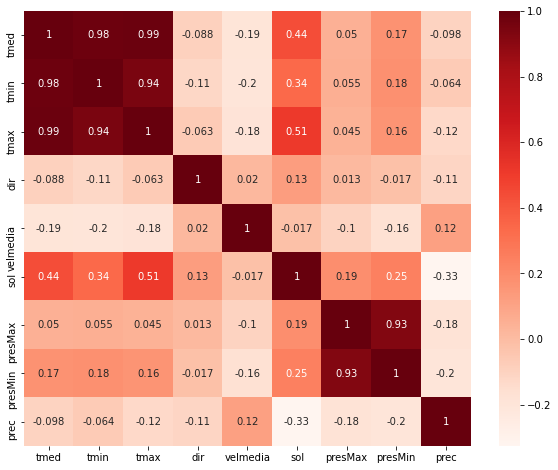

In [46]:
# I visualitzo la correlació amb un heatmap
plt.figure(figsize=(10,8))
cor = data_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('heatmapProvaInd.png', bbox_inches ="tight", dpi = 300)
plt.show()

### PREPARACIÓ DADES PER MUNTAR EL MODEL DE PREDICCIÓ

In [47]:
data_df.head(3)

,fecha,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
0,1983-03-01,10.0,6.6,13.4,27.0,2.8,3.8,970.3,967.5,0.0
1,1983-03-02,8.7,6.8,10.6,20.0,1.1,0.3,976.8,970.1,0.0
2,1983-03-03,8.4,5.4,11.4,5.0,1.4,2.8,980.3,976.8,0.0


In [48]:
#Converteixo la "fecha" en l'index, ja que cada data és univocament identificativa de cada observació
data_df.set_index('fecha', inplace=True)

In [49]:
data_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
fecha,,,,,,,,,
1983-03-01,10.0,6.6,13.4,27.0,2.8,3.8,970.3,967.5,0.0
1983-03-02,8.7,6.8,10.6,20.0,1.1,0.3,976.8,970.1,0.0
1983-03-03,8.4,5.4,11.4,5.0,1.4,2.8,980.3,976.8,0.0
1983-03-04,7.4,4.4,10.4,27.0,1.9,0.0,981.3,980.3,0.0
1983-03-05,10.7,7.4,14.0,32.0,0.8,0.7,980.9,979.1,0.0
...,...,...,...,...,...,...,...,...,...
2021-07-27,24.8,19.8,29.9,21.0,6.4,13.1,968.5,966.2,0.0
2021-07-28,25.2,19.7,30.6,8.0,3.1,12.5,968.8,966.5,0.0
2021-07-29,25.1,19.9,30.3,20.0,3.1,12.9,968.8,965.9,0.0


In [50]:
# I faig un resample per tenir les dades per mesos, amb la mitja associada (mensual) per cada observació
data_df = data_df.resample('M').mean()

+ *Visualitzo el comportament de la dada "prec" que serà la variable target en l'anàlisi de regressió posterior.*

In [51]:
data_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
fecha,,,,,,,,,
1983-03-31,10.700000,6.651613,14.748387,26.903226,2.977419,4.551613,971.712903,966.912903,1.135484
1983-04-30,13.200000,8.793333,17.606667,21.633333,4.590000,7.246667,966.390000,962.070000,0.113333
1983-05-31,15.712903,11.103226,20.322581,18.774194,4.190323,7.977419,965.896774,962.854839,0.893548
1983-06-30,20.380000,15.486667,25.273333,23.566667,3.180000,7.390000,971.006667,968.520000,1.250000
1983-07-31,25.374194,19.961290,30.787097,17.580645,2.412903,8.522581,968.764516,966.583871,0.019355
...,...,...,...,...,...,...,...,...,...
2021-03-31,12.090323,7.854839,16.322581,19.000000,3.674194,6.312903,974.641935,970.819355,0.300000
2021-04-30,12.930000,8.910000,16.960000,16.800000,3.496667,5.966667,969.416667,965.603333,2.110000
2021-05-31,17.258065,12.567742,21.967742,20.935484,3.529032,8.770968,970.538710,965.919355,0.790323


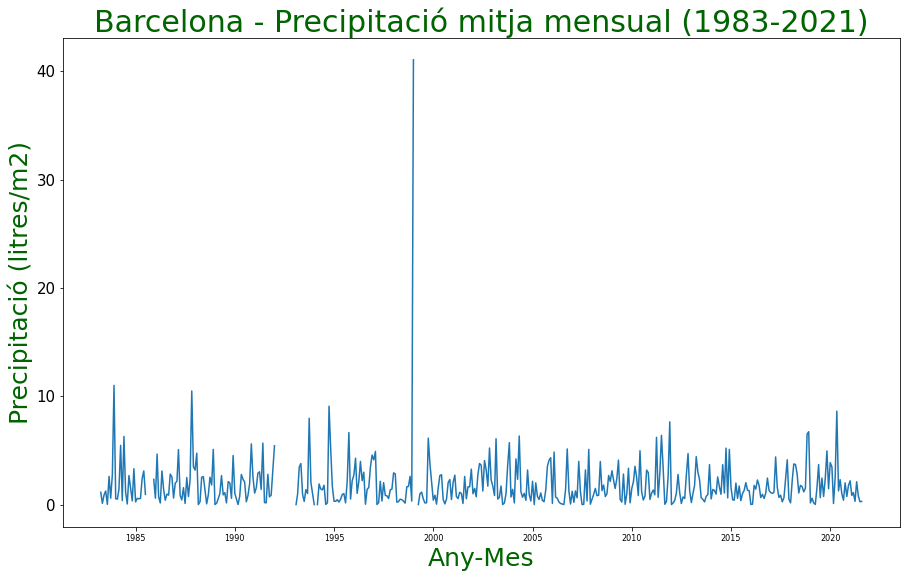

In [52]:
fig, ax = plt.subplots(figsize=(15, 9))
x = data_df.index
y = data_df["prec"].values

plt.title('Barcelona - Precipitació mitja mensual (1983-2021)', fontsize = 30,  color = 'Darkgreen')
plt.xlabel('Any-Mes', fontsize = 25 ,color = 'Darkgreen')
plt.ylabel('Precipitació (litres/m2)', fontsize = 25, color = 'Darkgreen')
plt.xticks(fontsize=8)
plt.yticks(fontsize=15)

plt.savefig('mitjaPlujaPlotProvaInd.png', bbox_inches ="tight", dpi = 300)
ax.plot(x, y);

+ *Ara toca estudiar els outliers que pugui tenir la variable "prec"*

In [53]:
data_df['prec'].describe()

count    442.000000
mean       1.872088
std        2.555837
min        0.000000
25%        0.523185
50%        1.242688
75%        2.547984
max       41.066667
Name: prec, dtype: float64

+ *Visualitze un boxplot de la variable "prec" per constatr la presència d'outliers.*

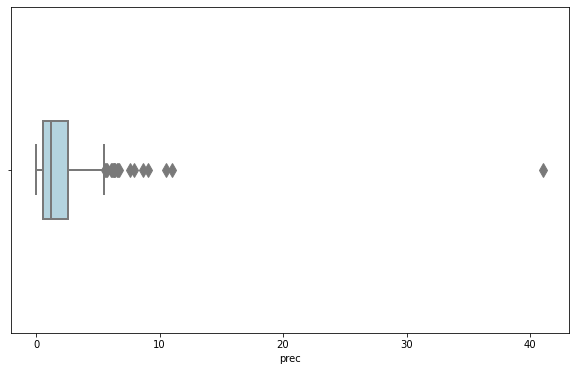

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.savefig('boxplot1ProvaInd.png', bbox_inches ="tight", dpi = 300)
ax = sns.boxplot(x="prec", data=data_df,  color='lightblue', fliersize=10,  orient='h', linewidth=2 , width=0.3)

+ *Filtarem aquests outliers per un millor comportament de l'algorisme posterior.*

In [56]:
# IQR
Q1 = data_df['prec'].quantile(0.25)
print(Q1)
 
Q3 = data_df['prec'].quantile(0.75)
print(Q3)

IQR = Q3 - Q1
print(IQR)
  
# límit superior
upper = Q3+1.5*IQR
print(upper)

# Límit inferior
lower = Q1-1.5*IQR
print(lower)

0.5231854838709677
2.547983870967742
2.024798387096774
5.585181451612902
-2.5140120967741932


In [57]:
data_df = data_df[data_df['prec'].between(lower, upper)]
data_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
fecha,,,,,,,,,
1983-03-31,10.700000,6.651613,14.748387,26.903226,2.977419,4.551613,971.712903,966.912903,1.135484
1983-04-30,13.200000,8.793333,17.606667,21.633333,4.590000,7.246667,966.390000,962.070000,0.113333
1983-05-31,15.712903,11.103226,20.322581,18.774194,4.190323,7.977419,965.896774,962.854839,0.893548
1983-06-30,20.380000,15.486667,25.273333,23.566667,3.180000,7.390000,971.006667,968.520000,1.250000
1983-07-31,25.374194,19.961290,30.787097,17.580645,2.412903,8.522581,968.764516,966.583871,0.019355
...,...,...,...,...,...,...,...,...,...
2021-03-31,12.090323,7.854839,16.322581,19.000000,3.674194,6.312903,974.641935,970.819355,0.300000
2021-04-30,12.930000,8.910000,16.960000,16.800000,3.496667,5.966667,969.416667,965.603333,2.110000
2021-05-31,17.258065,12.567742,21.967742,20.935484,3.529032,8.770968,970.538710,965.919355,0.790323


+ *I comprovo amb "describe()" i un boxplot que ha funcionat el filtre d'outliers*

In [58]:
data_df['prec'].describe()

count    423.000000
mean       1.553852
std        1.333636
min        0.000000
25%        0.507500
50%        1.133333
75%        2.330645
max        5.467742
Name: prec, dtype: float64

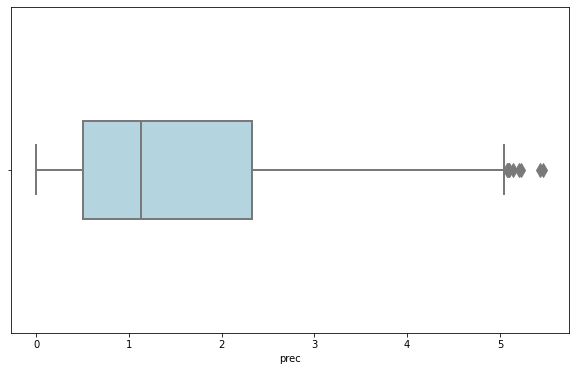

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.savefig('boxplot2ProvaInd.png', bbox_inches ="tight", dpi = 300)
ax = sns.boxplot(x="prec", data=data_df,  color='lightblue', fliersize=10,  orient='h', linewidth=2 , width=0.3)

In [60]:
data_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
fecha,,,,,,,,,
1983-03-31,10.700000,6.651613,14.748387,26.903226,2.977419,4.551613,971.712903,966.912903,1.135484
1983-04-30,13.200000,8.793333,17.606667,21.633333,4.590000,7.246667,966.390000,962.070000,0.113333
1983-05-31,15.712903,11.103226,20.322581,18.774194,4.190323,7.977419,965.896774,962.854839,0.893548
1983-06-30,20.380000,15.486667,25.273333,23.566667,3.180000,7.390000,971.006667,968.520000,1.250000
1983-07-31,25.374194,19.961290,30.787097,17.580645,2.412903,8.522581,968.764516,966.583871,0.019355
...,...,...,...,...,...,...,...,...,...
2021-03-31,12.090323,7.854839,16.322581,19.000000,3.674194,6.312903,974.641935,970.819355,0.300000
2021-04-30,12.930000,8.910000,16.960000,16.800000,3.496667,5.966667,969.416667,965.603333,2.110000
2021-05-31,17.258065,12.567742,21.967742,20.935484,3.529032,8.770968,970.538710,965.919355,0.790323


+ *Faig un "groupby()" per mesos amb la mitja corresponent de pluja diària, a cada mes de tots els anys
   Per tenir una idea de com es comporta la variable al llarg de l'any*

In [61]:
plujaMitja_df = data_df.groupby([data_df.index.month])["prec"].agg(['mean'])
plujaMitja_df

,mean
fecha,
1,1.605390
2,1.221971
3,1.553860
4,1.882112
5,1.696524
6,0.856495
7,0.971205
8,1.135238
9,2.026111


In [62]:
plujaMitja_df.describe()

,mean
count,12.000000
mean,1.571391
std,0.484896
min,0.856495
25%,1.200288
50%,1.579625
75%,1.917911
max,2.490190


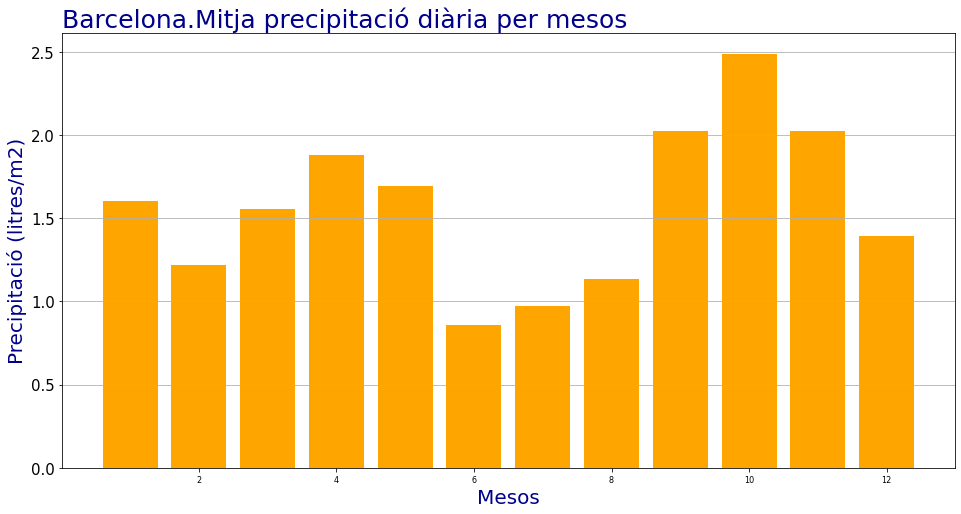

In [63]:

plt.figure(figsize=(16,8))
x = plujaMitja_df.index
y = plujaMitja_df['mean']
plt.title('Barcelona.Mitja precipitació diària per mesos', fontsize = 25, loc = 'left', color = 'Darkblue')
plt.xlabel('Mesos', fontsize = 20 ,color = 'Darkblue')
plt.ylabel('Precipitació (litres/m2)', fontsize = 20, color = 'Darkblue')
plt.xticks(fontsize=8)
plt.yticks(fontsize=15)

plt.grid(axis = 'y')
plt.bar(x, y, color = 'orange');
plt.savefig('MitjaPlujBarplotProvaInd.png', bbox_inches ="tight", dpi = 300)
plt.show()

### 1.- ANÀLISI DE REGRESSIÓ LINEAL.
### a) sense feature engineering

In [64]:
data_df.head(3)

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
fecha,,,,,,,,,
1983-03-31,10.700000,6.651613,14.748387,26.903226,2.977419,4.551613,971.712903,966.912903,1.135484
1983-04-30,13.200000,8.793333,17.606667,21.633333,4.590000,7.246667,966.390000,962.070000,0.113333
1983-05-31,15.712903,11.103226,20.322581,18.774194,4.190323,7.977419,965.896774,962.854839,0.893548


In [65]:
X = data_df.drop("prec", 1)
y = data_df["prec"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 4)

In [67]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((338, 8), (338,), (85, 8), (85,))

In [68]:
model = LinearRegression()

In [69]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.27776499267425114


In [71]:
y_predict = model.predict(X_test)
y_predict

array([ 1.07370459,  2.34784267,  2.90634307,  0.92193327,  1.51304117,
        0.8985982 ,  1.65019181,  0.80586608,  1.00235369,  0.80041121,
        1.29429909,  1.08978197,  0.74523211,  1.79935651,  2.0738124 ,
        0.77797032,  1.28177142,  1.22958143,  1.28662485,  1.95745563,
        2.01882782,  2.06519167,  0.85868626,  2.6832568 ,  3.98750837,
        2.28761465,  0.70391103,  1.4231658 ,  2.08738965,  1.23972794,
        1.653638  ,  2.07518956,  0.59987909, -0.02984938,  1.10051042,
        1.01204049,  0.45529422,  2.76329864,  1.86140677,  2.06027565,
        1.60379211,  1.12094697,  0.8058213 ,  1.49437655,  2.68454467,
        0.91137785,  1.0586855 ,  0.67276886,  0.54305101,  2.98446928,
        1.43042951,  1.54640359, -0.39584233,  1.98220542,  1.12053026,
        1.11513165,  2.20570689,  1.51632518,  2.50860047,  0.73047586,
        1.43864232,  1.18154801,  1.35243474,  0.18920698,  0.6348334 ,
        0.95514807,  1.66771509,  1.16718644,  0.34146925,  2.15

In [72]:
y_test

fecha
1989-06-30    1.096667
2008-11-30    2.136667
2000-12-31    2.061290
2009-05-31    0.483871
1989-10-31    0.577419
                ...   
2018-04-30    2.860000
1989-08-31    2.116129
2002-09-30    1.700000
1987-06-30    0.103333
1993-06-30    0.289655
Name: prec, Length: 85, dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test, y_predict)

0.24627944747455033

In [75]:
print('MSE = {}'.format (mean_squared_error(y_test, y_predict)))

MSE = 1.2004948732835465


In [76]:
print('RMSE = {}'.format (mean_squared_error(y_test, y_predict)**0.5))

RMSE = 1.095670969444544


### b) Estandaritzant variables.

In [77]:
sscaler = StandardScaler()
DataScaled_df = sscaler.fit_transform(data_df)

In [78]:
DataScaled_df = pd.DataFrame(DataScaled_df)

In [79]:
DataScaled_df

,0,1,2,3,4,5,6,7,8
0,-0.887223,-1.013929,-0.774756,0.453275,-1.812171,-1.385514,0.415668,0.170203,-0.314076
1,-0.451386,-0.606766,-0.317644,-0.177640,0.804141,0.028234,-1.225885,-1.171946,-1.081423
2,-0.013299,-0.167631,0.116699,-0.519938,0.155689,0.411566,-1.377993,-0.954438,-0.495702
3,0.800338,0.665706,0.908450,0.053820,-1.483496,0.103422,0.197869,0.615590,-0.228107
4,1.671000,1.516379,1.790241,-0.662830,-2.728063,0.697541,-0.493597,0.079016,-1.151974
...,...,...,...,...,...,...,...,...,...
418,-0.644842,-0.785183,-0.523002,-0.492904,-0.681698,-0.461592,1.318965,1.252827,-0.941289
419,-0.498457,-0.584586,-0.421063,-0.756289,-0.969724,-0.643217,-0.292478,-0.192728,0.417510
420,0.256076,0.110789,0.379802,-0.261187,-0.917213,0.827838,0.053554,-0.105146,-0.573195
421,1.308815,1.242374,1.355708,-0.361212,-1.283396,1.325673,0.046756,0.366166,-0.971318


In [80]:
DataScaled_df.rename(columns={0:'tmed', 1: 'tmin', 2: 'tmax', 3: 'dir', 4: 'velmedia', 5: 'sol', 
                              6: 'presMax', 7: 'presMin', 8: 'prec'}, inplace = True)

In [81]:
DataScaled_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
0,-0.887223,-1.013929,-0.774756,0.453275,-1.812171,-1.385514,0.415668,0.170203,-0.314076
1,-0.451386,-0.606766,-0.317644,-0.177640,0.804141,0.028234,-1.225885,-1.171946,-1.081423
2,-0.013299,-0.167631,0.116699,-0.519938,0.155689,0.411566,-1.377993,-0.954438,-0.495702
3,0.800338,0.665706,0.908450,0.053820,-1.483496,0.103422,0.197869,0.615590,-0.228107
4,1.671000,1.516379,1.790241,-0.662830,-2.728063,0.697541,-0.493597,0.079016,-1.151974
...,...,...,...,...,...,...,...,...,...
418,-0.644842,-0.785183,-0.523002,-0.492904,-0.681698,-0.461592,1.318965,1.252827,-0.941289
419,-0.498457,-0.584586,-0.421063,-0.756289,-0.969724,-0.643217,-0.292478,-0.192728,0.417510
420,0.256076,0.110789,0.379802,-0.261187,-0.917213,0.827838,0.053554,-0.105146,-0.573195
421,1.308815,1.242374,1.355708,-0.361212,-1.283396,1.325673,0.046756,0.366166,-0.971318


In [82]:
DataScaled_df['tmed'].mean()

2.1889503606084646e-16

In [83]:
DataScaled_df['tmed'].std()

1.0011841330376976

In [84]:
DataScaled_df['presMax'].mean()

-3.054688102151273e-15

In [85]:
DataScaled_df['presMax'].std()

1.0011841330376974

In [86]:
X = DataScaled_df.drop("prec", 1)
y = DataScaled_df["prec"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 4)

In [88]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((338, 8), (338,), (85, 8), (85,))

In [89]:
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

In [91]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2777649926742518


In [92]:
y_predict = model.predict(X_test)
y_predict

array([-0.36045526,  0.59606255,  1.01533859, -0.47439265, -0.03063757,
       -0.49191069,  0.07232381, -0.56152632, -0.41401962, -0.56562139,
       -0.19485109, -0.34838568, -0.60704531,  0.18430437,  0.39034322,
       -0.58246816, -0.20425584, -0.24343578, -0.20061228,  0.30299215,
        0.34906533,  0.38387149, -0.52187328,  0.84786382,  1.82698834,
        0.55084832, -0.63806576, -0.09810859,  0.4005359 , -0.23581861,
        0.07491093,  0.39137707, -0.71616437, -1.18891257, -0.34033165,
       -0.40674757, -0.82470676,  0.90795263,  0.23088659,  0.38018095,
        0.03749074, -0.32498957, -0.56155993, -0.04464944,  0.84883064,
       -0.48231678, -0.37173035, -0.66144474, -0.7588262 ,  1.07398931,
       -0.0926556 , -0.00559182, -1.4636699 ,  0.32157226, -0.3253024 ,
       -0.32935523,  0.48935873, -0.02817221,  0.71674625, -0.61812308,
       -0.0864901 , -0.2794953 , -0.15120764, -1.02446312, -0.68992355,
       -0.44945771,  0.08547885, -0.29027679, -0.91015716,  0.44

In [93]:
y_test

68    -0.343217
276    0.437529
184    0.380943
282   -0.803254
72    -0.733025
         ...   
386    0.980548
70     0.422111
205    0.109716
45    -1.088930
102   -0.949055
Name: prec, Length: 85, dtype: float64

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
r2_score(y_test, y_predict)

0.24627944747450714

In [96]:
print('MSE = {}'.format (mean_squared_error(y_test, y_predict)))

MSE = 0.6765710831013672


In [97]:
print('RMSE = {}'.format (mean_squared_error(y_test, y_predict)**0.5))

RMSE = 0.8225394112754519


### c) Normalitzant variables

In [98]:
nscaler =MinMaxScaler()
DataNormScaled_df = nscaler.fit_transform(data_df)

In [99]:
DataNormScaled_df = pd.DataFrame(DataNormScaled_df)

In [100]:
DataNormScaled_df

,0,1,2,3,4,5,6,7,8
0,0.268914,0.241931,0.291362,0.172529,0.159236,0.186131,0.525689,0.536502,0.207670
1,0.371781,0.338461,0.399471,0.112045,0.614104,0.491046,0.280418,0.347207,0.020728
2,0.475179,0.442571,0.502196,0.079230,0.501365,0.573723,0.257691,0.377884,0.163422
3,0.667215,0.640138,0.689450,0.134234,0.216379,0.507263,0.493147,0.599319,0.228614
4,0.872710,0.841814,0.897999,0.065531,0.000000,0.635401,0.389832,0.523641,0.003540
...,...,...,...,...,...,...,...,...,...
418,0.326122,0.296162,0.350903,0.081822,0.355778,0.385401,0.660654,0.689194,0.054867
419,0.360672,0.343719,0.375012,0.056572,0.305702,0.346229,0.419882,0.485315,0.385900
420,0.538758,0.508578,0.564422,0.104036,0.314832,0.663504,0.471584,0.497667,0.144543
421,0.787227,0.776854,0.795229,0.094447,0.251168,0.770876,0.470568,0.564141,0.047552


In [101]:
DataNormScaled_df.rename(columns={0:'tmed', 1: 'tmin', 2: 'tmax', 3: 'dir', 4: 'velmedia', 5: 'sol', 
                              6: 'presMax', 7: 'presMin', 8: 'prec'}, inplace = True)

In [102]:
DataNormScaled_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
0,0.268914,0.241931,0.291362,0.172529,0.159236,0.186131,0.525689,0.536502,0.207670
1,0.371781,0.338461,0.399471,0.112045,0.614104,0.491046,0.280418,0.347207,0.020728
2,0.475179,0.442571,0.502196,0.079230,0.501365,0.573723,0.257691,0.377884,0.163422
3,0.667215,0.640138,0.689450,0.134234,0.216379,0.507263,0.493147,0.599319,0.228614
4,0.872710,0.841814,0.897999,0.065531,0.000000,0.635401,0.389832,0.523641,0.003540
...,...,...,...,...,...,...,...,...,...
418,0.326122,0.296162,0.350903,0.081822,0.355778,0.385401,0.660654,0.689194,0.054867
419,0.360672,0.343719,0.375012,0.056572,0.305702,0.346229,0.419882,0.485315,0.385900
420,0.538758,0.508578,0.564422,0.104036,0.314832,0.663504,0.471584,0.497667,0.144543
421,0.787227,0.776854,0.795229,0.094447,0.251168,0.770876,0.470568,0.564141,0.047552


In [103]:
X = DataNormScaled_df.drop("prec", 1)
y = DataNormScaled_df["prec"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 4)

In [105]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((380, 8), (380,), (43, 8), (43,))

In [106]:
model = LinearRegression()

In [107]:
model.fit(X_train, y_train)

LinearRegression()

In [108]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2697126259155662


In [109]:
y_predict = model.predict(X_test)
y_predict

array([0.20302249, 0.42885145, 0.52788936, 0.17140058, 0.26766674,
       0.16079658, 0.29796825, 0.15079058, 0.19658226, 0.14580913,
       0.25246006, 0.19924629, 0.14856083, 0.3217935 , 0.38189525,
       0.13558959, 0.24292787, 0.22957076, 0.22905639, 0.35570293,
       0.35769988, 0.37644418, 0.16579565, 0.48270326, 0.72184236,
       0.40798775, 0.14476027, 0.25544452, 0.3955538 , 0.243034  ,
       0.30155067, 0.37665109, 0.11282396, 0.02066635, 0.20857792,
       0.20096713, 0.09211771, 0.49853778, 0.32956649, 0.38637726,
       0.28250311, 0.20369288, 0.14831391])

In [110]:
y_test

68     0.200570
276    0.390777
184    0.376991
282    0.088496
72     0.105605
330    0.044838
6      0.106686
285    0.004720
266    0.175811
272    0.329794
228    0.059744
212    0.313274
173    0.156932
192    0.096755
263    0.931563
422    0.053097
265    0.092625
253    0.223599
160    0.300295
417    0.201833
238    0.643776
204    0.582301
186    0.137168
106    0.190816
140    0.755162
193    0.300551
154    0.041804
411    0.073156
11     1.000000
381    0.092665
66     0.489538
47     0.136283
347    0.079646
312    0.070003
254    0.036578
392    0.028319
329    0.087906
321    0.236539
172    0.074376
84     0.463324
225    0.070796
14     0.010029
64     0.096018
Name: prec, dtype: float64

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [112]:
r2_score(y_test, y_predict)

0.3239775117827437

In [113]:
print('MSE = {}'.format (mean_squared_error(y_test, y_predict)))

MSE = 0.03859714447190409


In [114]:
print('RMSE = {}'.format (mean_squared_error(y_test, y_predict)**0.5))

RMSE = 0.19646155978181606


In [115]:
print('MAE = {}'.format(mean_absolute_error(y_test, y_predict)))

MAE = 0.15239425021150432


### 1.- ANÀLISI D'AGRUPACIÓ.CLUSTERING AMB KMEANS.
### a) amb variables normalitzades com a la regressió lineal.

In [116]:
DataNormScaled_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
0,0.268914,0.241931,0.291362,0.172529,0.159236,0.186131,0.525689,0.536502,0.207670
1,0.371781,0.338461,0.399471,0.112045,0.614104,0.491046,0.280418,0.347207,0.020728
2,0.475179,0.442571,0.502196,0.079230,0.501365,0.573723,0.257691,0.377884,0.163422
3,0.667215,0.640138,0.689450,0.134234,0.216379,0.507263,0.493147,0.599319,0.228614
4,0.872710,0.841814,0.897999,0.065531,0.000000,0.635401,0.389832,0.523641,0.003540
...,...,...,...,...,...,...,...,...,...
418,0.326122,0.296162,0.350903,0.081822,0.355778,0.385401,0.660654,0.689194,0.054867
419,0.360672,0.343719,0.375012,0.056572,0.305702,0.346229,0.419882,0.485315,0.385900
420,0.538758,0.508578,0.564422,0.104036,0.314832,0.663504,0.471584,0.497667,0.144543
421,0.787227,0.776854,0.795229,0.094447,0.251168,0.770876,0.470568,0.564141,0.047552


In [117]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Generem una llista on incloure els valors de SSE per cada k (número de Clusters)
sse = []
for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(DataNormScaled_df)
    sse.append(kmeans.inertia_)

print(sse)

[66.41723178040812, 56.54506974201507, 50.5094809526341, 46.275903429584226, 43.55434033304412]


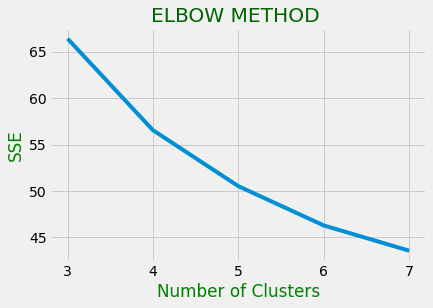

In [118]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(3, 8), sse)
 plt.xticks(range(3, 8))
 plt.title("ELBOW METHOD ", color = 'Darkgreen')
 plt.xlabel("Number of Clusters", color = 'green')
 plt.ylabel("SSE", color = 'green')
 
 plt.savefig('elbowPlotProvaInd.png', bbox_inches ="tight", dpi = 300)
 plt.show()

In [119]:
from kneed import KneeLocator

In [120]:
# Silhouette coefficient

silhouette_coefficients = []

for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(DataNormScaled_df)
    score = silhouette_score(DataNormScaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients 

[0.33162663929991243,
 0.2632807595770832,
 0.23690281179954834,
 0.22741360014060832,
 0.21760132945308533]

In [121]:
kmeans = KMeans(n_clusters=4).fit(DataNormScaled_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.26056446 0.26802988 0.25405165 0.14045778 0.57786894 0.2896577
  0.33623978 0.35856883 0.48695586]
 [0.58601788 0.59430979 0.57858675 0.10588172 0.41162881 0.48279374
  0.43770013 0.51190434 0.43258035]
 [0.7795005  0.78095371 0.77771842 0.11748749 0.37718576 0.75035215
  0.46796197 0.55663928 0.13302945]
 [0.27687575 0.27653285 0.27696647 0.15163221 0.53750733 0.39808221
  0.58612334 0.59667067 0.12627966]]


In [122]:
# Número de iteracions per convergir al resultat final
kmeans.n_iter_

15

In [123]:
kmeans.labels_[:50]

array([3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 3, 0, 3, 1, 2, 1, 1, 3, 0, 3, 0, 3,
       3, 0, 1, 1, 0, 3, 0, 0, 3, 0, 1, 2, 2, 2, 1, 1, 3, 3, 0, 0, 3, 3,
       1, 2, 1, 2, 1, 0])

In [125]:
import collections
counter = collections.Counter(kmeans.labels_)
print(counter)

Counter({3: 116, 2: 108, 1: 105, 0: 94})


In [126]:
kmeans_silhouette = silhouette_score(DataNormScaled_df
      , kmeans.labels_
    ).round(2)
kmeans_silhouette

0.26

### b) amb components principals - PCA

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(2)

In [129]:
#Transformem les dades
df = pca.fit_transform(DataNormScaled_df)
df.shape

(423, 2)

In [130]:
#explained_variance_ratio_ returns the percentage of variance explained by each of the selected components
print(pca.explained_variance_ratio_)

[0.58283652 0.18836814]


In [131]:
#Fem una predicció dels valors d'assignació als diferents clusters
label = kmeans.fit_predict(df)
 
kmeans.labels_[:50]

array([2, 2, 3, 1, 1, 3, 1, 3, 2, 2, 2, 0, 2, 3, 1, 3, 3, 2, 0, 2, 2, 2,
       2, 3, 3, 3, 0, 2, 0, 0, 2, 0, 3, 1, 1, 1, 3, 3, 2, 2, 0, 0, 2, 2,
       3, 1, 3, 1, 3, 0])

In [132]:
kmeans_silhouette = silhouette_score(df
      , kmeans.labels_
    ).round(2)

In [133]:
kmeans_silhouette

0.42

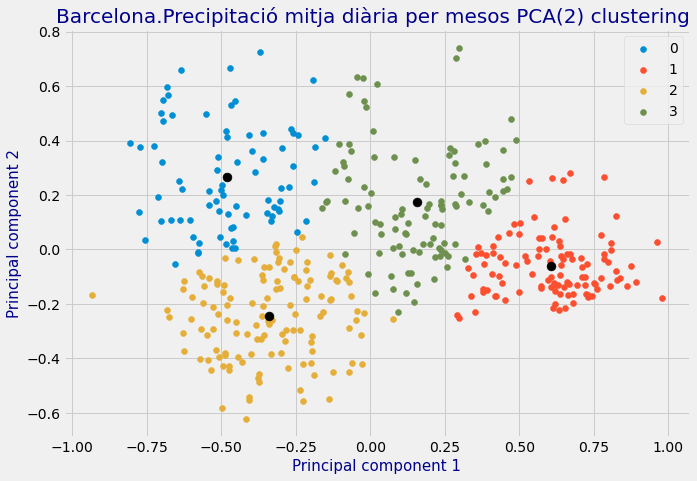

In [134]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

plt.figure(figsize=(10,7)) 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('Barcelona.Precipitació mitja diària per mesos PCA(2) clustering', fontsize = 20, loc = 'right', color = 'Darkblue')
plt.xlabel('Principal component 1', fontsize = 15 ,color = 'Darkblue')
plt.ylabel('Principal component 2', fontsize = 15, color = 'Darkblue')
plt.legend()
plt.savefig('pcaClusterPlotProva.png', bbox_inches ="tight", dpi = 300)
plt.show()

In [135]:
counter2 = collections.Counter(kmeans.labels_)
print(counter2)

Counter({2: 131, 1: 109, 3: 104, 0: 79})


In [136]:
#busquem l'observació més representativa de cada cluster. La més propera al centroide del seu cluster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)
closest

array([ 49, 169,  53, 309], dtype=int64)

In [137]:
punks=data_df.index.values
for row in closest:
    print(punks[row])

1987-11-30T00:00:00.000000000
1999-08-31T00:00:00.000000000
1988-03-31T00:00:00.000000000
2011-10-31T00:00:00.000000000


In [138]:
values = ['1988-03-31', '1999-08-31', '2011-10-31', '1987-11-30']
closests_df = data_df[data_df.index.isin(values)]
closests_df

,tmed,tmin,tmax,dir,velmedia,sol,presMax,presMin,prec
fecha,,,,,,,,,
1987-11-30,10.956667,8.046667,13.866667,25.133333,4.680000,5.096667,970.306667,964.840000,3.503333
1988-03-31,11.070968,7.058065,15.083871,24.064516,4.741935,6.329032,970.206452,964.941935,0.251613
1999-08-31,24.593548,20.554839,28.632258,17.935484,4.483871,8.022581,968.009677,964.454839,0.170968
2011-10-31,19.141935,15.016129,23.270968,20.612903,3.970968,6.929032,972.980645,969.667742,2.625806


In [139]:
#Per guardar DataFrame com file_name.png
import dataframe_image as dfi
dfi.export(closests_df, 'closests_df.png')